# Feature Dependence

### Import libraries and set plotting style

In [1]:
import importlib.util
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import statsmodels.api as sm
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

sys.path.append('../scr')
from data_preprocessing import *
from analysis import *
from utils import *
from plot import *



 ### Feature Numbers and Model Types

In [2]:
feature_numbers = ['2', '7', '9']  
average_confidence = ['5','7']
model_types = ['LP', 'RP']  

### Load CSV files

In [3]:
df_predictions = load_and_clean_predictions('compas','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/compas_predictions_2LP_1104_2259.csv for model 2LP
Loaded file: ../predictions/compas_predictions_2RP_nodate.csv for model 2RP
Loaded file: ../predictions/compas_predictions_7LP_nodate.csv for model 7LP
Loaded file: ../predictions/compas_predictions_7RP_nodate.csv for model 7RP
Loaded file: ../predictions/compas_predictions_9LP_nodate.csv for model 9LP
Loaded file: ../predictions/compas_predictions_9RP_nodate.csv for model 9RP


In [4]:
df_confidence = load_and_clean_predictions('compas','average_confidence',average_confidence, model_types, data_path='../predictions/')

Loaded file: ../predictions/compas_average_confidence_5LP_1124_1325.csv for model 5LP
Loaded file: ../predictions/compas_average_confidence_5RP_1125_1627.csv for model 5RP
Loaded file: ../predictions/compas_average_confidence_7LP_1124_1316.csv for model 7LP
Loaded file: ../predictions/compas_average_confidence_7RP_1125_1247.csv for model 7RP


In [7]:
# df_predictions['9']['LP']

### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}


In [9]:
model_types = ['LP', 'RP']


mean_of_abs_diff = {model_type: {} for model_type in model_types}
combined_mean_of_abs_diff = {}

for model_type in model_types:
    # suffix based on model_type
    suffix = 'LM' if model_type == 'LP' else 'RM'

    substring_1_2vs7 = f'2{suffix}'  
    substring_2_2vs7 = f'7{suffix}' 
    substring_1_2vs9 = f'2{suffix}'  
    substring_2_2vs9 = f'9{suffix}'  

    # mean of absolute differences
    mean_of_abs_diff[model_type]['abs_diff_2vs7'] = compute_row_stats(
        compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['7'][model_type],
            substring_1=substring_1_2vs7, 
            substring_2=substring_2_2vs7
        )
    )['mean']
    
    mean_of_abs_diff[model_type]['abs_diff_2vs9'] = compute_row_stats(
        compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['9'][model_type],
            substring_1=substring_1_2vs9, 
            substring_2=substring_2_2vs9
        )
    )['mean']

    combined_mean_of_abs_diff[model_type] = pd.concat([
        mean_of_abs_diff[model_type]['abs_diff_2vs7'].rename("abs_diff_2vs7"),
        mean_of_abs_diff[model_type]['abs_diff_2vs9'].rename("abs_diff_2vs9")
    ], axis=1)


In [9]:
#print("Combined mean absolute differences for LP:")
#print(combined_mean_of_abs_diff['LP'])

In [10]:
#print("Combined mean absolute differences for LP:")
#print(combined_mean_of_abs_diff['LP'])

In [10]:
# Add ID column from df_confidence to combined_mean_of_abs_diff
for model_type in model_types:
   # extract the ID column from df_confidence and reset the index in combined_mean_of_abs_diff
    combined_mean_of_abs_diff[model_type] = (
    df_confidence['5'][model_type][['ID']] # extract the ID column from df_confidence
    .join(combined_mean_of_abs_diff[model_type].reset_index(drop=True), rsuffix='_mean_abs_diff')  # reset the index in combined_mean_of_abs_diff and join
)

#print(combined_mean_of_abs_diff['LP'].head())

In [11]:
for model_type in model_types:
    combined_mean_of_abs_diff[model_type] = (
    df_confidence['7'][model_type][['ID']]
    .join(combined_mean_of_abs_diff[model_type].reset_index(drop=True), rsuffix='_mean_abs_diff')
)

#print(combined_mean_of_abs_diff['LP'].head())

### Correlation between Mean of Absolute Differences and Average Confidence

model type: LP, 2LP vs. 7LP with absolute mean difference 2vs7 and  5LP Average Confidence


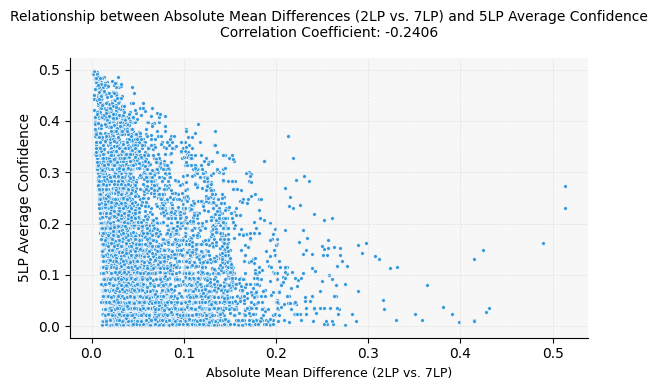

model type: LP, 2LP vs. 9LP with absolute mean difference 2vs9 and  7LP Average Confidence


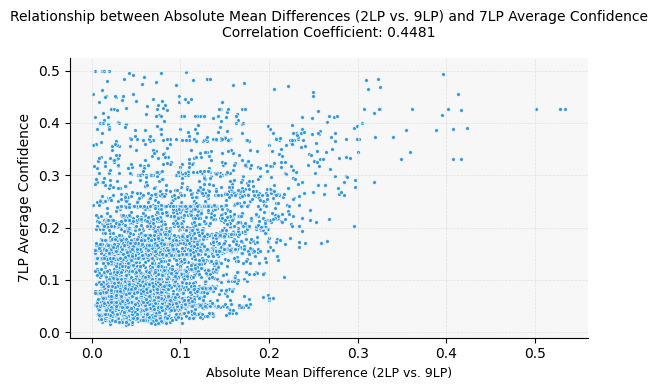

Model Type: LP, Comparison: 2LP vs. 9LP
    ID  abs_diff_2vs9  Average_Confidence
0    1       0.039450            0.252343
1    3       0.037838            0.074303
2    4       0.161593            0.263489
3    7       0.039654            0.176415
4    8       0.020162            0.039080
5    9       0.075448            0.114607
6   10       0.086635            0.241174
7   14       0.233387            0.163676
8   15       0.017883            0.036229
9   16       0.091531            0.241028
10  18       0.058586            0.065750
11  19       0.085328            0.186549
12  20       0.061824            0.118542
13  21       0.053501            0.167818
14  22       0.048180            0.062891
15  23       0.082969            0.027632
16  24       0.121776            0.076363
17  25       0.044923            0.031736
18  26       0.126902            0.120951
19  27       0.044532            0.117855
Unmatched IDs for LP, 2LP vs. 9LP: set()
model type: RP, 2RP vs. 7RP with abso

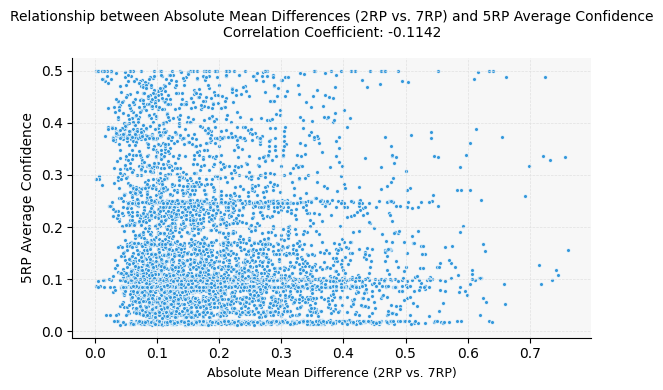

model type: RP, 2RP vs. 9RP with absolute mean difference 2vs9 and  7RP Average Confidence


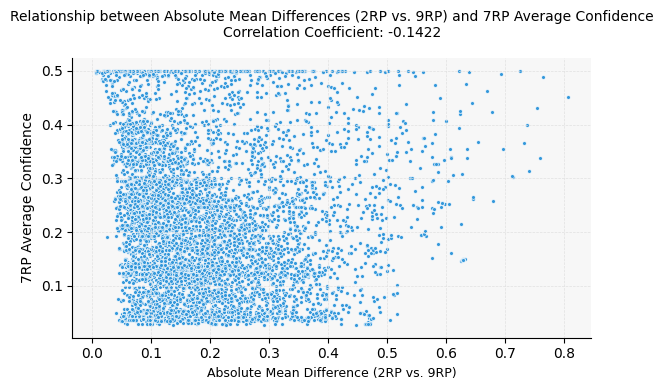

Model Type: RP, Comparison: 2RP vs. 9RP
    ID  abs_diff_2vs9  Average_Confidence
0    1       0.097701            0.240554
1    3       0.267445            0.084038
2    4       0.131093            0.291715
3    7       0.261455            0.228386
4    8       0.105733            0.355103
5    9       0.558421            0.283743
6   10       0.230323            0.224624
7   14       0.070960            0.118413
8   15       0.225920            0.257150
9   16       0.270514            0.225186
10  18       0.260147            0.368329
11  19       0.246952            0.194036
12  20       0.182121            0.211713
13  21       0.482984            0.225731
14  22       0.089364            0.235814
15  23       0.126606            0.067676
16  24       0.323046            0.123861
17  25       0.209724            0.247798
18  26       0.176723            0.071720
19  27       0.056396            0.134390
Unmatched IDs for RP, 2RP vs. 9RP: set()


In [12]:
# parameters 
params = {
    'LP': {
        'comparison_labels': ['2LP vs. 7LP', '2LP vs. 9LP'],
        'average_confidence_list': ['5', '7'],
        'average_confidence_labels': ['5LP Average Confidence', '7LP Average Confidence'],
        'indices': ['2vs7', '2vs9']
    },
    'RP': {
        'comparison_labels': ['2RP vs. 7RP', '2RP vs. 9RP'],
        'average_confidence_list': ['5', '7'],
        'average_confidence_labels': ['5RP Average Confidence', '7RP Average Confidence'],
        'indices': ['2vs7', '2vs9']
    }
}

results = []  # store results from clusters_correlation
for model_type, model_params in params.items():
    comparison_labels = model_params['comparison_labels']
    average_confidence_list = model_params['average_confidence_list']
    average_confidence_labels = model_params['average_confidence_labels']
    indices = model_params['indices']

    for average_confidence, comparison_label, index, average_confidence_label in zip(
        average_confidence_list, comparison_labels, indices, average_confidence_labels
    ):
        print(f"model type: {model_type}, {comparison_label} with absolute mean difference {index} and  {average_confidence_label}")

        if model_type not in combined_mean_of_abs_diff or average_confidence not in df_confidence:
            print(f"Skipping invalid configuration: {model_type}, {average_confidence}")
            continue

      
        merged_df_with_clusters = correlation_analysis(
            abs_diff_n=combined_mean_of_abs_diff[model_type],
            confidence_df=df_confidence[average_confidence][model_type],
            comparison_label=comparison_label,
            index=index,
            confidence_label=average_confidence_label,
        )
        # save results
        results.append(merged_df_with_clusters)
      
# Debugging
    print(f"Model Type: {model_type}, Comparison: {comparison_label}")
    print(merged_df_with_clusters[['ID', f'abs_diff_{index}', 'Average_Confidence']].head(20))

    # Find unmatched IDs
    unmatched_ids = set(combined_mean_of_abs_diff[model_type]['ID']) - set(df_confidence[average_confidence][model_type]['ID'])
    print(f"Unmatched IDs for {model_type}, {comparison_label}: {unmatched_ids}")

